In [2]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import string

import scipy as sp
from scipy import sparse
import sklearn

from openTSNE import TSNE
from openTSNE import affinity, initialization, TSNEEmbedding
from openTSNE.affinity import Affinities

#import umap
#import numba
#import pynndescent

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [17]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *
from pubmed_landscape_src.scalebars import add_scalebar_frac
from pubmed_landscape_src.metrics import knn_accuracy_ls
from pubmed_landscape_src.metrics import knn_recall

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
variables_path = Path("../../results/variables/bert-models")
figures_path = Path("../../results/figures/bert-models")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

# Import data

In [7]:
# Import
df = pd.read_pickle(berenslab_data_path / "df_labeled_papers_subset")
df = df.reset_index(drop=True)
colors = df["Colors"].to_numpy()

In [8]:
# PubMedBERT embeddings

embeddings_sep = np.load(
    berenslab_data_path / "embeddings/embeddings_PubMedBERT/embeddings_sep.npy"
)
print(embeddings_sep.shape)

tcmalloc: large alloc 6144000000 bytes == 0x80c8a000 @ 


(1000000, 768)


# t-SNE

Ran in ber1

In [12]:
%%time
# affinities
A = affinity.Uniform(
    embeddings_sep,
    k_neighbors=10,
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# initialization
I = initialization.pca(embeddings_sep, random_state=42)

===> Finding 10 nearest neighbors using Annoy approximate search using euclidean distance...


tcmalloc: large alloc 1474551808 bytes == 0x29d3b6000 @ 
tcmalloc: large alloc 1916911616 bytes == 0x2f5cf0000 @ 
tcmalloc: large alloc 2491990016 bytes == 0x2599fe000 @ 
tcmalloc: large alloc 3239583744 bytes == 0x36890c000 @ 
tcmalloc: large alloc 4211466240 bytes == 0x2601fe000 @ 


   --> Time elapsed: 432.11 seconds


tcmalloc: large alloc 6144000000 bytes == 0x386718000 @ 


CPU times: user 1h 29min 52s, sys: 5min, total: 1h 34min 52s
Wall time: 7min 25s


In [13]:
def opt_tsne(embeddings, A, I, exgg=1, rs=42):
    # t-SNE optimization
    E = TSNEEmbedding(I, A, n_jobs=-1, random_state=42, verbose=True)

    ## early exaggeration
    E = E.optimize(
        n_iter=125, exaggeration=12, momentum=0.5, n_jobs=-1, verbose=True
    )

    ## exaggeration annealing
    exs = np.linspace(12, 1, 125)
    for i in range(125):
        E = E.optimize(
            n_iter=1,
            exaggeration=exs[i],
            momentum=0.8,
            n_jobs=-1,
            verbose=True,
        )

    ## final optimization without exaggeration
    E = E.optimize(
        n_iter=500, exaggeration=exgg, momentum=0.8, n_jobs=-1, verbose=True
    )

    tsne = np.array(E)
    return tsne

## Exgg = 1

In [14]:
%%time
%%memit
tsne_pubmedbert_sep_1M_exgg_1 = opt_tsne(embeddings_sep, A, I, exgg=1)

===> Running optimization with exaggeration=12.00, lr=83333.33 for 125 iterations...
Iteration   50, KL divergence 10.2379, 50 iterations in 21.3013 sec
Iteration  100, KL divergence 9.8251, 50 iterations in 20.8694 sec
   --> Time elapsed: 52.58 seconds
===> Running optimization with exaggeration=12.00, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration=11.91, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration=11.82, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.35 seconds
===> Running optimization with exaggeration=11.73, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.40 seconds
===> Running optimization with exaggeration=11.65, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.39 seconds
===> Running optimization with exaggeration=11.56, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration

In [23]:
np.save(
    variables_path / "tsne_pubmedbert_sep_1M_exgg_1",
    tsne_pubmedbert_sep_1M_exgg_1,
)

In [9]:
tsne_pubmedbert_sep_1M_exgg_1 = np.load(
    variables_path / "tsne_pubmedbert_sep_1M_exgg_1.npy",
)

## Exgg = 4

In [17]:
%%time
%%memit
tsne_pubmedbert_sep_1M_exgg_4 = opt_tsne(embeddings_sep, A, I, exgg=4)

===> Running optimization with exaggeration=12.00, lr=83333.33 for 125 iterations...
Iteration   50, KL divergence 10.2379, 50 iterations in 20.2875 sec
Iteration  100, KL divergence 9.8251, 50 iterations in 21.7738 sec
   --> Time elapsed: 52.81 seconds
===> Running optimization with exaggeration=12.00, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration=11.91, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.37 seconds
===> Running optimization with exaggeration=11.82, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.35 seconds
===> Running optimization with exaggeration=11.73, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration=11.65, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.37 seconds
===> Running optimization with exaggeration=11.56, lr=83333.33 for 1 iterations...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration

In [18]:
np.save(
    variables_path / "tsne_pubmedbert_sep_1M_exgg_4",
    tsne_pubmedbert_sep_1M_exgg_4,
)

In [10]:
tsne_pubmedbert_sep_1M_exgg_4 = np.load(
    variables_path / "tsne_pubmedbert_sep_1M_exgg_4.npy",
)

# UMAP

In [9]:
%%time
%%memit

umap_ = umap.UMAP(
    n_neighbors=10, verbose=True, low_memory=True, n_jobs=-1, random_state=42
)

umap_pubmedbert_sep_1M = umap_.fit_transform(embeddings_sep)

tcmalloc: large alloc 3072000000 bytes == 0x1f211c000 @ 


UMAP(n_neighbors=10, random_state=42, verbose=True)


tcmalloc: large alloc 3072000000 bytes == 0x2a9acc000 @ 


Mon Jun  5 14:17:41 2023 Construct fuzzy simplicial set


tcmalloc: large alloc 3072000000 bytes == 0x2a9acc000 @ 
tcmalloc: large alloc 3072000000 bytes == 0x2a9acc000 @ 


Mon Jun  5 14:17:42 2023 Finding Nearest Neighbors
Mon Jun  5 14:17:43 2023 Building RP forest with 55 trees
Mon Jun  5 14:18:17 2023 NN descent for 20 iterations
	 1  /  20
	 2  /  20
	 3  /  20
	 4  /  20
	 5  /  20
	Stopping threshold met -- exiting after 5 iterations
Mon Jun  5 14:18:46 2023 Finished Nearest Neighbor Search


tcmalloc: large alloc 3072000000 bytes == 0xd109b6000 @ 


Mon Jun  5 14:18:53 2023 Construct embedding


tcmalloc: large alloc 3072000000 bytes == 0xd109b6000 @ 
tcmalloc: large alloc 7991681024 bytes == 0xddd404000 @ 
tcmalloc: large alloc 7991681024 bytes == 0xfddc64000 @ 


Epochs completed:   0%|            0/200 [00:00]

Mon Jun  5 14:31:11 2023 Finished embedding
peak memory: 72954.94 MiB, increment: 63949.56 MiB
CPU times: user 3h 16min 12s, sys: 1h 25min 7s, total: 4h 41min 19s
Wall time: 13min 38s


In [10]:
np.save(variables_path / "umap_pubmedbert_sep_1M", umap_pubmedbert_sep_1M)

In [11]:
umap_pubmedbert_sep_1M = np.load(variables_path / "umap_pubmedbert_sep_1M.npy")

# Plot

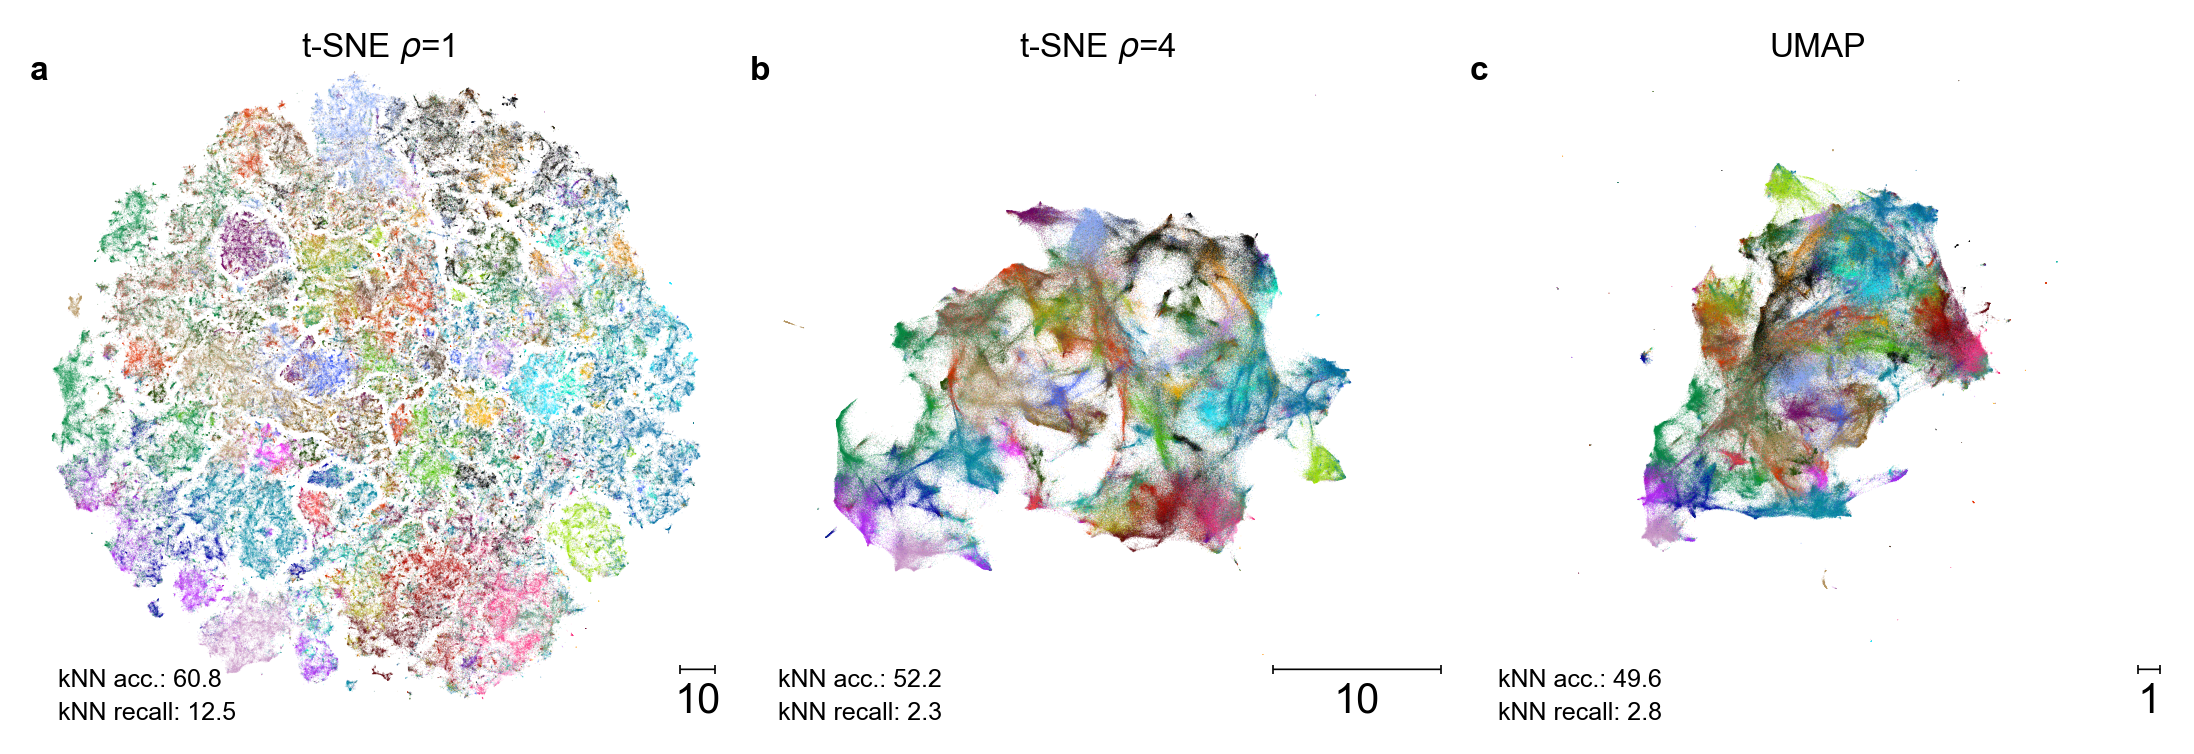

In [30]:
%matplotlib inline
fig, axs = plt.subplots(
    1,
    3,
    figsize=(7.2, 2.4),
    layout="constrained",
    dpi=300,
)

txt_kwargs = dict(size=8, weight="bold", va="top", ha="left")

# tsne exgg 1
x_lim = (-110, 110)
y_lim = (-110, 110)

plot_tsne_colors(
    np.vstack(
        (
            -tsne_pubmedbert_sep_1M_exgg_1[:, 0],
            tsne_pubmedbert_sep_1M_exgg_1[:, 1],
        )
    ).T,
    colors,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=axs[0],
    plot_type="subplot_2",
)
axs[0].text(
    0,
    1,
    string.ascii_lowercase[0],
    transform=axs[0].transAxes,
    **txt_kwargs,
)
axs[0].set_title(r"t-SNE $\rho$=1", y=0.98)
axs[0].text(
    0.04,
    0.05,
    f"kNN acc.: {knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1*100:.1f}",
    transform=axs[0].transAxes,
    va="bottom",
    ha="left",
    size=6,
)
axs[0].text(
    0.04,
    0,
    f"kNN recall: {knn_recall_tsne_vs_umap[0]*100:.1f}",
    transform=axs[0].transAxes,
    va="bottom",
    ha="left",
    size=6,
)
add_scalebar_frac(axs[0])


# tsne exgg 4
x_lim = (-20, 20)
y_lim = (-20, 20)

plot_tsne_colors(
    np.vstack(
        (
            -tsne_pubmedbert_sep_1M_exgg_4[:, 0],
            tsne_pubmedbert_sep_1M_exgg_4[:, 1],
        )
    ).T,
    colors,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=axs[1],
    plot_type="subplot_2",
)
axs[1].text(
    0,
    1,
    string.ascii_lowercase[1],
    transform=axs[1].transAxes,
    **txt_kwargs,
)
axs[1].set_title(r"t-SNE $\rho$=4", y=0.98)
axs[1].text(
    0.04,
    0.05,
    f"kNN acc.: {knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4*100:.1f}",
    transform=axs[1].transAxes,
    va="bottom",
    ha="left",
    size=6,
)
axs[1].text(
    0.04,
    0,
    f"kNN recall: {knn_recall_tsne_vs_umap[1]*100:.1f}",
    transform=axs[1].transAxes,
    va="bottom",
    ha="left",
    size=6,
)
add_scalebar_frac(axs[1])


# umap
y_lim = (-25, 5)
x_lim = (-20, 10)


plot_tsne_colors(
    np.vstack(
        (-umap_pubmedbert_sep_1M[:, 1], -umap_pubmedbert_sep_1M[:, 0])
    ).T,
    colors,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=axs[2],
    plot_type="subplot_2",
)
axs[2].text(
    0,
    1,
    string.ascii_lowercase[2],
    transform=axs[2].transAxes,
    **txt_kwargs,
)
axs[2].set_title("UMAP", y=0.98)
axs[2].text(
    0.04,
    0.05,
    f"kNN acc.: {knn_accuracy_umap_pubmedbert_sep_1M*100:.1f}",
    transform=axs[2].transAxes,
    va="bottom",
    ha="left",
    size=6,
)
axs[2].text(
    0.04,
    0,
    f"kNN recall: {knn_recall_tsne_vs_umap[2]*100:.1f}",
    transform=axs[2].transAxes,
    va="bottom",
    ha="left",
    size=6,
)
add_scalebar_frac(axs[2])


fig.savefig(
    figures_path / "tsne_vs_umap_pubmedbert_sep_1M_with_knn_acc_v2.jpg"
)
fig.savefig(
    figures_path / "tsne_vs_umap_pubmedbert_sep_1M_with_knn_acc_v2.pdf"
)

# kNN accuracies

Ran in gber3

## Exgg = 1

In [ ]:
%%capture cap
%%time
%%memit
knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1 = knn_accuracy_ls(tsne_pubmedbert_sep_1M_exgg_1, colors)

In [ ]:
with open(variables_path / "verbose_knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1.txt", "w") as f:
    f.write(cap.stdout)

In [22]:
print(knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1)

0.6076


In [ ]:
np.save(variables_path / "knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1", knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1)

In [13]:
knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1 = np.load(
    variables_path / "knn_accuracy_tsne_pubmedbert_sep_1M_exgg_1.npy"
)

## Exgg = 4

In [ ]:
%%capture cap
%%time
%%memit
knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4 = knn_accuracy_ls(tsne_pubmedbert_sep_1M_exgg_4, colors)

In [ ]:
with open(variables_path / "verbose_knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4.txt", "w") as f:
    f.write(cap.stdout)

In [23]:
print(knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4)

0.5217


In [ ]:
np.save(variables_path / "knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4", knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4)

In [14]:
knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4 = np.load(
    variables_path / "knn_accuracy_tsne_pubmedbert_sep_1M_exgg_4.npy"
)

## UMAP

In [ ]:
%%capture cap
%%time
%%memit
knn_accuracy_umap_pubmedbert_sep_1M = knn_accuracy_ls(umap_pubmedbert_sep_1M, colors)

In [ ]:
with open(variables_path / "verbose_knn_accuracy_umap_pubmedbert_sep_1M.txt", "w") as f:
    f.write(cap.stdout)

In [18]:
print(knn_accuracy_umap_pubmedbert_sep_1M)

0.4958


In [ ]:
np.save(variables_path / "knn_accuracy_umap_pubmedbert_sep_1M", knn_accuracy_umap_pubmedbert_sep_1M)

In [15]:
knn_accuracy_umap_pubmedbert_sep_1M = np.load(
    variables_path / "knn_accuracy_umap_pubmedbert_sep_1M.npy"
)

# kNN recall

In [ ]:
knn_recall

In [19]:
%%time
%%memit
knn_recall_tsne_vs_umap = knn_recall(
    embeddings_sep,
    [
        tsne_pubmedbert_sep_1M_exgg_1,
        tsne_pubmedbert_sep_1M_exgg_4,
        umap_pubmedbert_sep_1M,
    ],
    subset_size=10000,
)

In [20]:
with open(variables_path / "verbose_knn_recall_tsne_vs_umap.txt", "w") as f:
    f.write(cap.stdout)

In [21]:
print(knn_recall_tsne_vs_umap)

[0.12485 0.02258 0.02759]


In [22]:
np.save(variables_path / "knn_recall_tsne_vs_umap", knn_recall_tsne_vs_umap)